# Pretraining for my ViT model 

## Load data first

I think we can use MNIST for now to just show the code works

In [9]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 42.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import scipy

In [11]:
def load_mnist(batch_size=32):
    transform = transforms.Compose([
        transforms.Grayscale(3),  # Convert grayscale to 3 channels (required for ViT)
        transforms.Resize((224, 224)),  # Resize images to 224x224 (ViT input size)
        transforms.ToTensor(),  # Convert images to tensors
        # There might be better normalization 
        transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
    ])
    
    train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

def load_tiny_imagenet(batch_size=32, data_dir="./tiny-imagenet-200"):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to 224x224 (ViT input size)
        transforms.ToTensor(),  # Convert images to tensors
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
    ])
    
    # Load training and validation datasets
    train_dataset = datasets.ImageNet(root="./data", train=True, transform=transform, download=True)
    test_dataset = datasets.ImageNet(root="./data", train=False, transform=transform, download=True)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader

In [13]:
train_loader, test_loader = load_mnist(batch_size=128)
# train_loader, test_loader = load_tiny_imagenet(batch_size=128) # I haven't tested this... 


## Define model and train 

In [7]:
from hf_src import ViTForImageClassification, ViTConfig

In [19]:
from torch.optim import AdamW
from tqdm.notebook import tqdm

In [8]:
config = ViTConfig(
    num_labels=10,  # MNIST has 10 classes (digits 0-9)
    hidden_size=768,  # Default hidden size for ViT
    num_hidden_layers=12,  # Number of transformer layers
    num_attention_heads=12,  # Number of attention heads
    image_size=224,  # Input image size
    patch_size=16,  # Patch size
    intermediate_size=3072,  # Feed-forward layer size
    hidden_dropout_prob=0.1,  # Dropout probability
    attention_probs_dropout_prob=0.1,  # Dropout for attention
)

In [35]:
model = ViTForImageClassification(config)


In [36]:
device = 'cuda'

In [37]:
model = model.to(device)

In [39]:
epochs = 5
lr = 5e-5

optimizer = AdamW(model.parameters(), lr=lr)

all_loss = []
for epoch in range(epochs):
    model.train()
    
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")
    for batch in progress_bar:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        loss = model(images, labels).loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        all_loss.append(loss.item())
        
        progress_bar.set_description(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/5, Loss: 246.4970:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2/5, Loss: 246.4970:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3/5, Loss: 246.4970:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4/5, Loss: 246.4970:   0%|          | 0/469 [00:00<?, ?it/s]

In [45]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in tqdm(test_loader):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images).logits
        _, predicted = torch.max(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

  0%|          | 0/79 [00:00<?, ?it/s]

In [46]:
print(f'Test accuracy with custom code: {correct / total * 100:2.1f}%')

Test accuracy with custom code: 98.2%


In [47]:
from matplotlib import pyplot as plt 

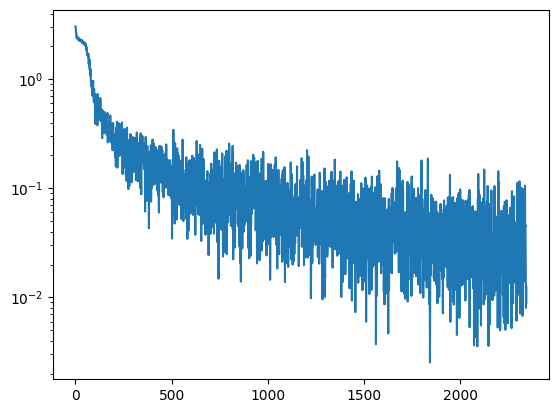

In [50]:
plt.semilogy(all_loss)

## I think MNIST is too easy... 

Need to use tiny imagenet

In [49]:
print('hello')

hello
